In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create Classification dataset
from sklearn.datasets import make_circles

# Set 1000 samples
n_samples = 1000

# Features and Labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# Let's create Regression dataset
X_reg = tf.range(0, 1000, 5)
X_reg

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
       780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
       845, 850, 8

In [5]:
y_reg = X_reg + 100
y_reg

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([ 100,  105,  110,  115,  120,  125,  130,  135,  140,  145,  150,
        155,  160,  165,  170,  175,  180,  185,  190,  195,  200,  205,
        210,  215,  220,  225,  230,  235,  240,  245,  250,  255,  260,
        265,  270,  275,  280,  285,  290,  295,  300,  305,  310,  315,
        320,  325,  330,  335,  340,  345,  350,  355,  360,  365,  370,
        375,  380,  385,  390,  395,  400,  405,  410,  415,  420,  425,
        430,  435,  440,  445,  450,  455,  460,  465,  470,  475,  480,
        485,  490,  495,  500,  505,  510,  515,  520,  525,  530,  535,
        540,  545,  550,  555,  560,  565,  570,  575,  580,  585,  590,
        595,  600,  605,  610,  615,  620,  625,  630,  635,  640,  645,
        650,  655,  660,  665,  670,  675,  680,  685,  690,  695,  700,
        705,  710,  715,  720,  725,  730,  735,  740,  745,  750,  755,
        760,  765,  770,  775,  780,  785,  790,  795,  800,  805,  810,
     

In [7]:
# Let's split the dataset into training and testing data
len(X_reg)

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

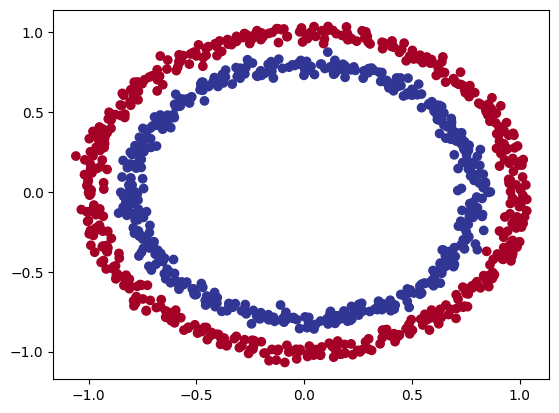

In [8]:
# Let's plot the classification dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [15]:
# Let's build a model for classification dataset

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 990us/step - loss: 5.1393 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6828 - accuracy: 0.5360
Epoch 3/100
32/32 [==============================] - 0s 893us/step - loss: 4.5302 - accuracy: 0.5320
Epoch 4/100
32/32 [==============================] - 0s 806us/step - loss: 5.5670 - accuracy: 0.5270
Epoch 5/100
32/32 [==============================] - 0s 757us/step - loss: 7.1324 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 721us/step - loss: 7.1475 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 825us/step - loss: 7.1302 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 759us/step - loss: 7.1239 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 700us/step - loss: 7.1071 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 728us/step - loss: 7.0676 - accuracy

In [16]:
model.evaluate(X,y)

32/32 [==============================] - 0s 615us/step - loss: 0.6962 - accuracy: 0.5060


[0.6961515545845032, 0.5059999823570251]

In [12]:
# Lets Create a plotting function 
def plot_decision_boundary(model, X, y):
    
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    # Define the axis boundaries and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values ( We are going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # Check for multiclass 
    if model.output_shape[-1] > 1:
        print("We are doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print(" we are doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot the decision boundary 
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 508us/step
 we are doing binary classification...


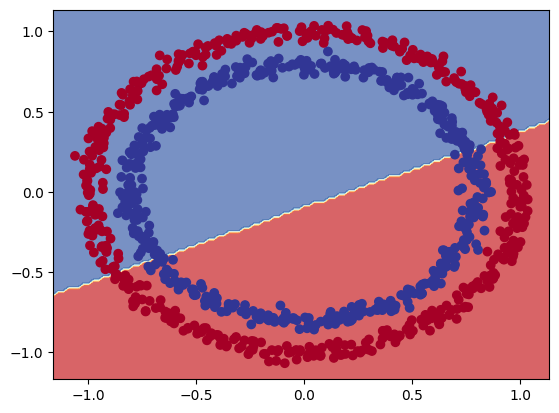

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model, X, y)

In [10]:
# Let's build a model for regression dataset

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_reg_train, axis= -1), y_reg_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 245.3767 - mae: 245.3767
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 112.2246 - mae: 112.2246
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 63.5518 - mae: 63.5518
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 53.4929 - mae: 53.4929
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 47.3871 - mae: 47.3871
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 42.8592 - mae: 42.8592
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 42.5296 - mae: 42.5296
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 45.0280 - mae: 45.0280
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 45.1890 - mae: 45.1890
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 46.1216 - mae: 46.1216
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 2ms/step


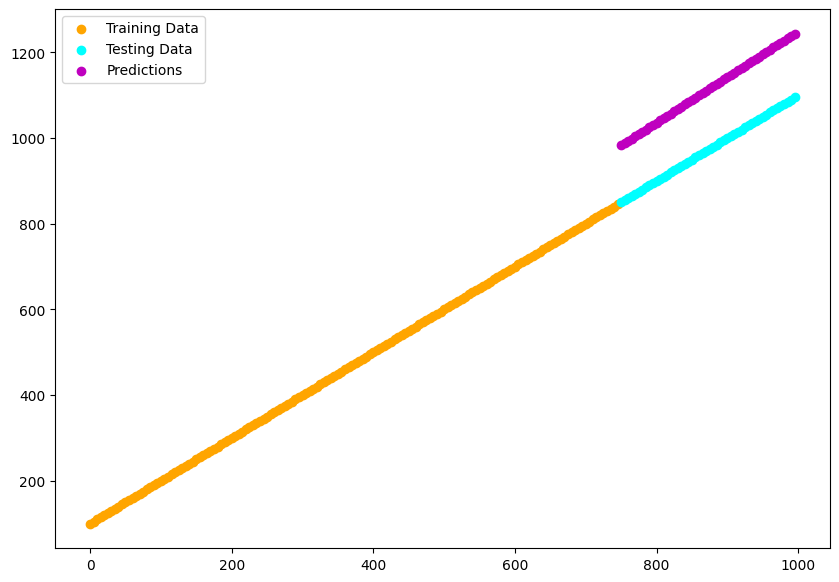

In [14]:
# Make predictions with our trained model
y_reg_preds = model_1.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="orange", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="cyan", label="Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c="m", label="Predictions")
plt.legend()
plt.show()

In [22]:
# Since the missing part was non-linearity, lets add the linear activation function

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1) # Output layer
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 882us/step - loss: 0.6959 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 947us/step - loss: 0.6975 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 863us/step - loss: 0.6977 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 865us/step - loss: 0.6970 - accuracy: 0.4950
Epoch 5/100
32/32 [==============================] - 0s 742us/step - loss: 0.6971 - accuracy: 0.4610
Epoch 6/100
32/32 [==============================] - 0s 786us/step - loss: 0.6956 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 831us/step - loss: 0.6999 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 808us/step - loss: 0.6959 - accuracy: 0.4620
Epoch 9/100
32/32 [==============================] - 0s 726us/step - loss: 0.6950 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 742us/step - loss: 0.6941 - accura

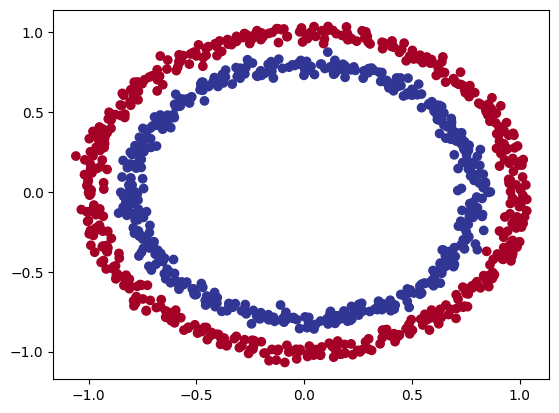

In [20]:
# Let's check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 474us/step
 we are doing binary classification...


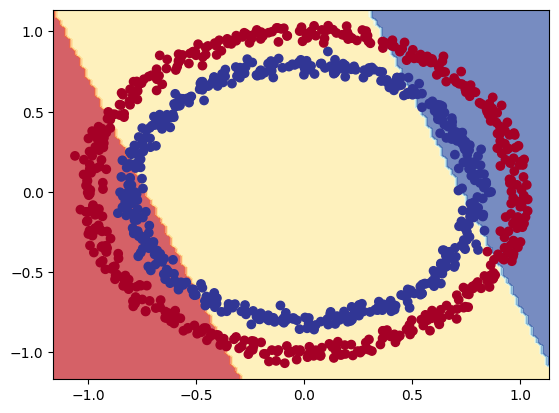

In [23]:
# Check the decision boundary (blue  is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_2, X, y)

Well it looks like we are getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we are going to have to do is add some non-linearity to our model.

To do so, we'll use activation parameter in one of our layers.

In [28]:
# Let's build a model with activation function as relu

# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # Can also so activation = ['relu']
    tf.keras.layers.Dense(1) # Output layer
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7299 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 896us/step - loss: 3.8915 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 726us/step - loss: 3.8150 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 871us/step - loss: 3.7676 - accuracy: 0.4950
Epoch 5/100
32/32 [==============================] - 0s 806us/step - loss: 3.7286 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 710us/step - loss: 3.6768 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 726us/step - loss: 3.6148 - accuracy: 0.4920
Epoch 8/100
32/32 [==============================] - 0s 677us/step - loss: 3.5846 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 742us/step - loss: 3.5240 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 645us/step - loss: 3.4322 - accuracy

313/313 [==============================] - 0s 476us/step
 we are doing binary classification...


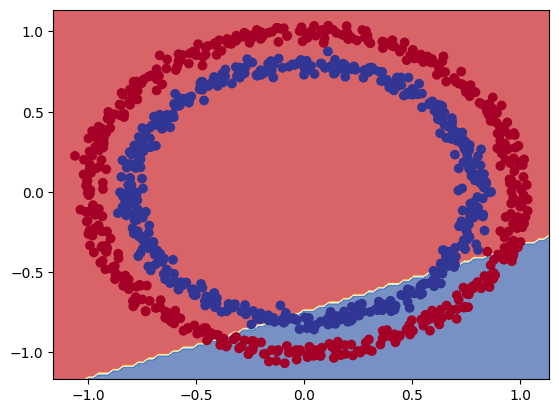

In [29]:
# Check the decision boundary (blue is blue class, yellow is crossover and red is red class)
plot_decision_boundary(model_3, X, y)